# DATA AUGMENTATION DEMONSTRATION

### Importing the Modules

In [ ]:
!pip install tensorflow tensorflow-datasets matplotlib

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

### Loading the Dataset

In [3]:
(ds_train, _), ds_info = tfds.load(
    "rock_paper_scissors",
    split=["train", "test"],
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.SYQVJE_3.0.0/rock_paper_scissors-train.tfre…

Generating test examples...:   0%|          | 0/372 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.SYQVJE_3.0.0/rock_paper_scissors-test.tfrec…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


- Visualizing the original images

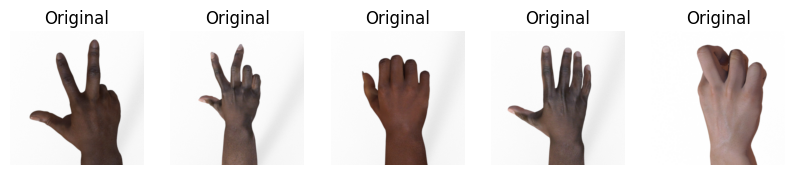

In [14]:
def visualize_images(dataset, title, num_images=5):
    plt.figure(figsize=(10, 5))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(image.numpy().astype("uint8"))
        plt.title(title)
        plt.axis("off")
    plt.show()

visualize_images(ds_train, title="Original")

### Performing Augmentation Techniques

- Flip the Images Horizontally

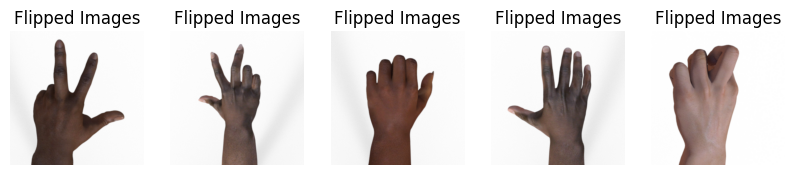

In [10]:
flip_layer = tf.keras.layers.RandomFlip("horizontal")

def apply_augmentation(dataset, augmentation_layer):
    augmented_dataset = dataset.map(
        lambda img, lbl: (augmentation_layer(img), lbl)
    )
    return augmented_dataset

flipped_ds = apply_augmentation(ds_train, flip_layer)
visualize_images(flipped_ds, title="Flipped Images")

- Rotate the Images Randomly

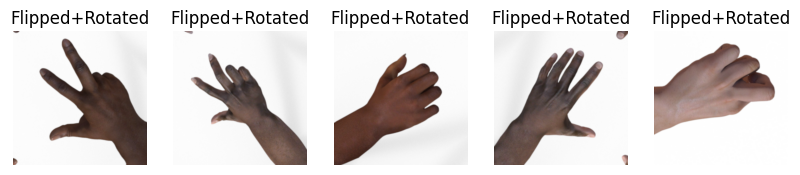

In [13]:
rotation_layer = tf.keras.layers.RandomRotation(0.2)

rotated_ds = apply_augmentation(flipped_ds, rotation_layer)
visualize_images(rotated_ds, title="Flipped+Rotated")

- Adjust Brightness

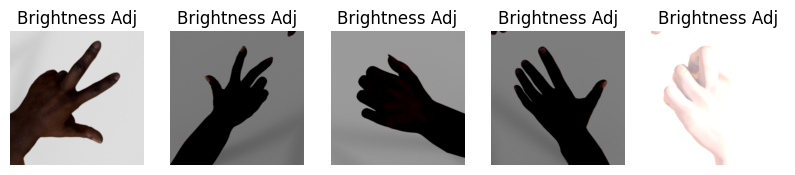

In [16]:
brightness_layer = tf.keras.layers.RandomBrightness(0.6)

bright_ds = apply_augmentation(rotated_ds, brightness_layer)
visualize_images(bright_ds, title="Brightness Adj")

- Add random Zoom

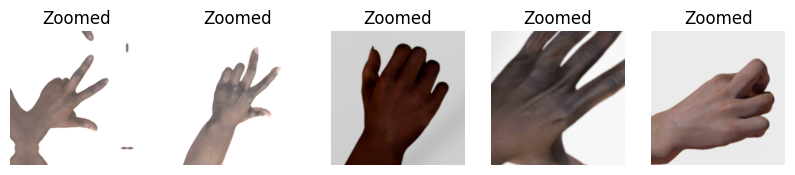

In [19]:
zoom_layer = tf.keras.layers.RandomZoom(0.7)

zoomed_ds = apply_augmentation(bright_ds, zoom_layer)
visualize_images(zoomed_ds, title="Zoomed")

<hr>

### Use ImageData Generator at once

In [21]:
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128))
    return image / 255.0, label

ds_train = ds_train.map(preprocess)

- Converting Images to Tensors

In [22]:
images = []
labels = []
for img, lbl in ds_train:
    images.append(img.numpy())
    labels.append(lbl.numpy())
images = tf.convert_to_tensor(images)
labels = tf.convert_to_tensor(labels)

- **Image Augmentation**

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_augmentation = ImageDataGenerator(
    rescale=1.0 / 255.0,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    width_shift_range=0.2,
    height_shift_range=0.2
)


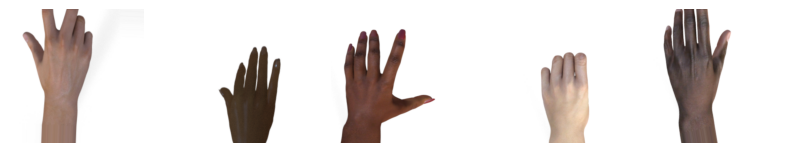

In [28]:
def visualize_augmented_images(generator, images, num_images=5):
    plt.figure(figsize=(10, 5))
    for i, augmented in enumerate(generator.flow(images, batch_size=1)):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(augmented[0])
        plt.axis("off")
        if i + 1 == num_images:
            break
    plt.show()
visualize_augmented_images(data_augmentation, images)

<hr>